In [1]:
import pandas as pd
from pandas._libs.tslibs.timestamps import Timestamp
import datetime
import random

In [2]:
clients = pd.read_csv('../datasets/clients.csv')
items = pd.read_csv('../datasets/items.csv')

In [3]:
clients

,client_id,name,gender,dob,email,phone,channel,first_contact,lat,lon,location_name,created_at
0,100000000,Saroj vatsa Patera,Male,2004-01-20,saroj.vatsa@fakeemail.com,9841618454,Other,browser,27.7176,85.3284,Gairidhara Rd,2020-09-01 11:32:23.672943
1,100000001,Karuna Nirolla,Female,1997-12-03,karuna.nirolla@fakeemail.com,9841935484,Google Search,app,27.6921,85.3312,Bhakti Thapa Sadak,2020-09-01 14:28:42.013533
2,100000002,Sona Khayaju,Female,1999-07-10,sona.khayaju@fakeemail.com,9841585006,Facebook/Ads,app,27.6874,85.3319,'We' for Change,2020-09-01 15:33:16.952466
3,100000003,Paulo Mahaseth,Prefer not to say,2005-01-26,paulo.mahaseth@fakeemail.com,9841278643,Facebook/Ads,browser,27.6943,85.3062,Sahid Shukra Marg,2020-09-01 03:20:14.648833
4,100000004,Samita Mahajan,Female,2003-01-24,samita.mahajan@fakeemail.com,9841267804,Google Search,browser,27.7023,85.3099,Pako Sadak,2020-09-01 14:41:47.335170
...,...,...,...,...,...,...,...,...,...,...,...,...
21789,100021789,Chhiring Pokharal,Male,1987-12-03,chhiring.pokharal@fakeemail.com,9841013843,Other,browser,27.7065,85.3124,Masa Galli Kathmandu 44600 Nepal,2021-08-31 12:53:42.017632
21790,100021790,Suman Lingden,Other,2001-03-16,suman.lingden@fakeemail.com,9841172670,Word of Mouth,browser,27.7126,85.3176,Coffeepasal,2021-08-31 14:47:51.042093
21791,100021791,Pramod Gachhadar,Male,2005-09-14,pramod.gachhadar@fakeemail.com,9841912537,Word of Mouth,browser,27.7160,85.3131,Hotel Peace N Park,2021-08-31 08:31:09.518596
21792,100021792,Ansu Shahu,Female,2006-06-24,ansu.shahu@fakeemail.com,9841697135,Word of Mouth,browser,27.7118,85.3077,Yapikhya Marg,2021-08-31 19:38:52.098266


In [4]:
items

,item_id,item_name,category,image_url,inventory
0,10000,Vivo Y51 (8+128GB),Phone,https://dummyimage.com/600x400/000/fff&text=Vi...,43
1,10001,Galaxy M12 (4+64GB),Phone,https://dummyimage.com/600x400/000/fff&text=Ga...,43
2,10002,Nikon D5,Camera,https://dummyimage.com/600x400/000/fff&text=Ni...,53
3,10003,"ZenBook 14 UX425EA (14” FHD, Intel i5-1135G7, ...",Laptop,https://dummyimage.com/600x400/000/fff&text=Ze...,45
4,10004,Redmi Note 9 Pro (4+128GB),Phone,https://dummyimage.com/600x400/000/fff&text=Re...,16
...,...,...,...,...,...
286,10286,"ZenBook 14 UX435EG (14” FHD Touch, Intel i7-11...",Laptop,https://dummyimage.com/600x400/000/fff&text=Ze...,40
287,10287,iPhone 12 (256GB),Phone,https://dummyimage.com/600x400/000/fff&text=iP...,37
288,10288,"Aspire 5 2021 (15.6″ FHD, Intel i5-1135G7, MX3...",Laptop,https://dummyimage.com/600x400/000/fff&text=As...,82
289,10289,Redmi Note 10 (4+128GB),Phone,https://dummyimage.com/600x400/000/fff&text=Re...,79


## Add trend and seasonality

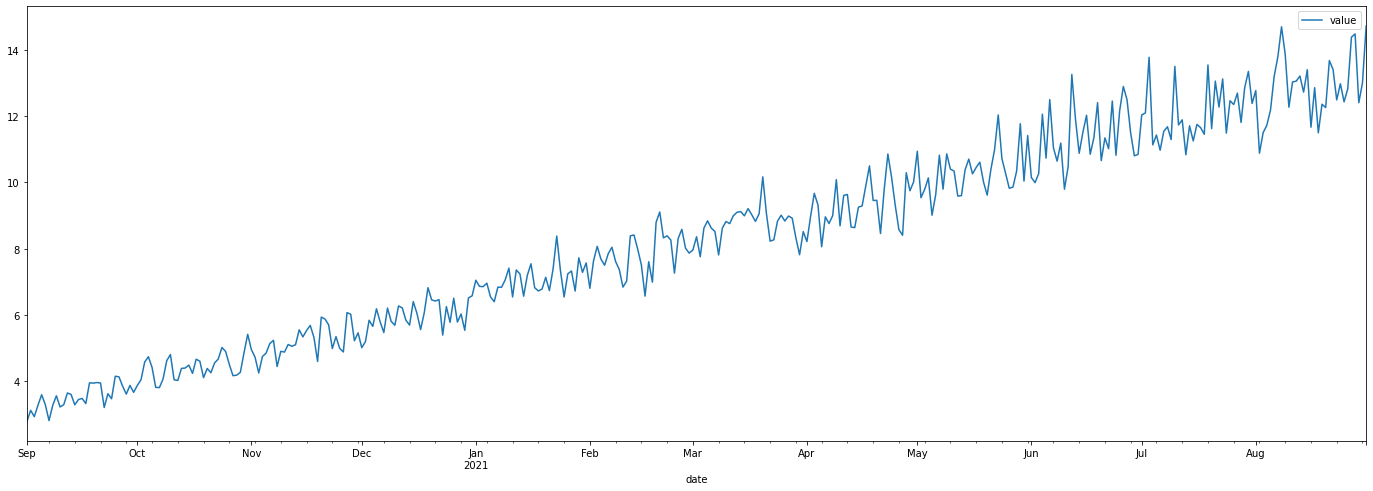

In [5]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor, HolidayFactor

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=10.0, offset=2., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.05, 5: 1.1, 6: 1.05}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [6]:
data = g.generate()

In [7]:
data['rows'] = (2*data.value).astype(int)

In [8]:
data = data[['date', 'rows']]

<AxesSubplot:xlabel='date'>

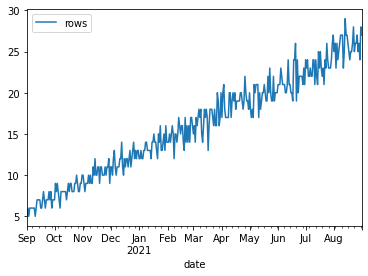

In [9]:
data.set_index('date').plot()

In [10]:
data

,date,rows
0,2020-09-01,5
1,2020-09-02,6
2,2020-09-03,5
3,2020-09-04,6
4,2020-09-05,6
...,...,...
360,2021-08-27,25
361,2021-08-28,26
362,2021-08-29,24
363,2021-08-30,28


In [11]:
## holiday: dashain, christmas/new year, valentines day
## major promotion campain with sisan baniya, multiple tech channels, facebook promo etc
## 

In [12]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = int (num*1.1)
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = int (num*1.2)
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = int (num*1.1)
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 1.2)
    return num

In [13]:
data['rows'] = data.apply(nepali_holiday, axis=1)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_77165/2206892774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rows'] = data.apply(nepali_holiday, axis=1)


<AxesSubplot:xlabel='date'>

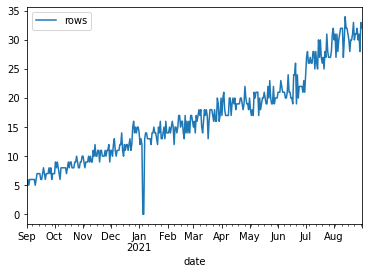

In [14]:
data.set_index('date').plot()

In [15]:
data

,date,rows
0,2020-09-01,5
1,2020-09-02,6
2,2020-09-03,5
3,2020-09-04,6
4,2020-09-05,6
...,...,...
360,2021-08-27,30
361,2021-08-28,31
362,2021-08-29,28
363,2021-08-30,33


In [16]:
def create_list(row):
    return [str(row.date)]*row.rows

In [17]:
df = pd.DataFrame({'created_at': data.apply(create_list, axis=1).sum()})

In [18]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return datetime.datetime.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [19]:
df['created_at'] = df['created_at'].apply(random_times)

<AxesSubplot:xlabel='created_at'>

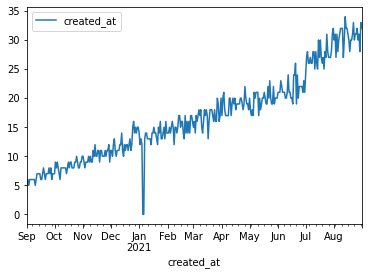

In [22]:
df.resample('D', on='created_at').count().plot()

In [24]:
df

,created_at
0,2020-09-01 21:45:03.228334
1,2020-09-01 03:41:53.622839
2,2020-09-01 01:52:51.593339
3,2020-09-01 17:55:59.641655
4,2020-09-01 18:49:42.614047
...,...
6090,2021-08-31 03:22:53.144102
6091,2021-08-31 17:59:30.977911
6092,2021-08-31 19:07:52.254019
6093,2021-08-31 05:56:03.098235


In [27]:
df.to_csv('../datasets/transactions.csv', index=False)